In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [6]:
dataset = pd.read_excel("Superstore_USA.xlsx")

In [8]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [10]:
  dataset.shape

(9426, 24)

In [24]:
dataset.isna().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [26]:
dataset["Product Base Margin"].fillna(dataset["Product Base Margin"].mean(), inplace =True)

C:\Users\HP\AppData\Local\Temp\ipykernel_9904\3242463924.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Product Base Margin"].fillna(dataset["Product Base Margin"].mean(), inplace =True)


In [34]:
dataset.isna().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

## Order Priority

In [36]:
# Let's first analyze the order priority column as it is important factor
dataset["Order Priority"].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [38]:
# 2 different critical are varying in the way...
dataset["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [60]:
# One critical is having space and other is simple, so lets combine it in one
dataset["Order Priority"] = dataset["Order Priority"].replace("Critical ", "Critical")

In [62]:
dataset["Order Priority"].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

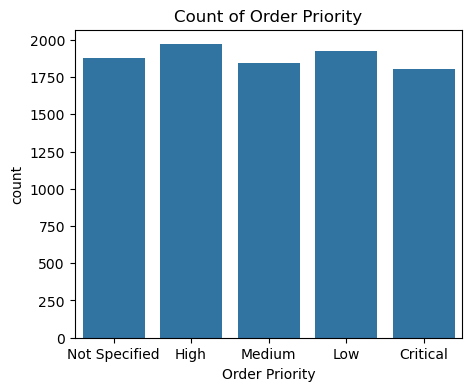

In [72]:
# Let's plot the above column
plt.figure(figsize=(5,4))
sns.countplot(x="Order Priority", data=dataset)
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority.jpg")
plt.show()

## Ship Mode

In [76]:
dataset["Ship Mode"].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [86]:
x = dataset["Ship Mode"].value_counts().index
y = dataset["Ship Mode"].value_counts().values
x, y

(Index(['Regular Air', 'Delivery Truck', 'Express Air'], dtype='object', name='Ship Mode'),
 array([7036, 1283, 1107], dtype=int64))

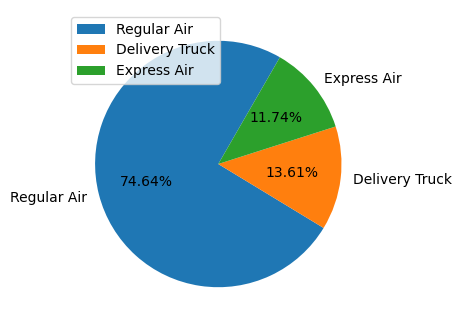

In [108]:
# Let's plot it
plt.figure(figsize=(5,4))
plt.pie(y, labels=x, startangle=60, autopct="%0.2f%%")
plt.legend(loc=2)
plt.show()

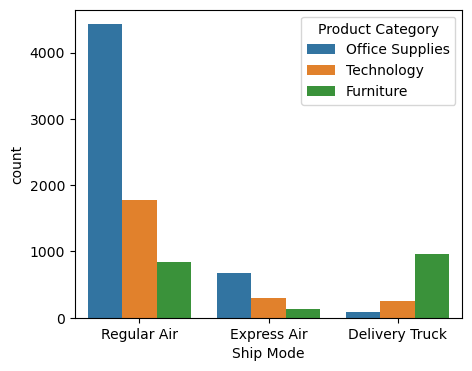

In [123]:
# Analyzing(comparing) ship mode and product category
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode", data=dataset, hue="Product Category")
plt.show()

## Customer Segment

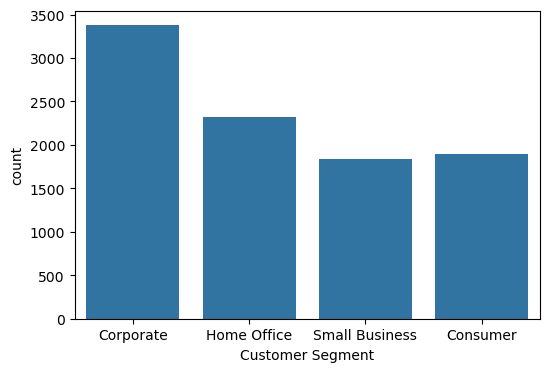

In [132]:
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Segment", data = dataset)
plt.show()

## Product Category

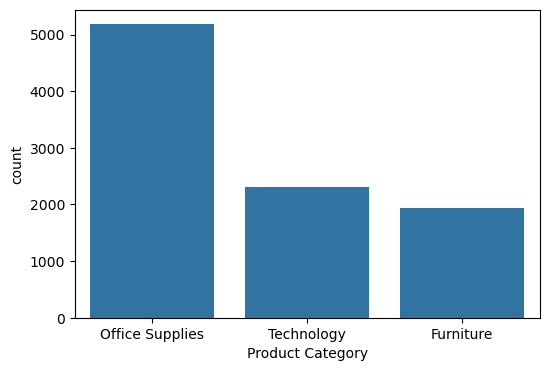

In [135]:
plt.figure(figsize=(6,4))
sns.countplot(x="Product Category", data = dataset)
plt.show()

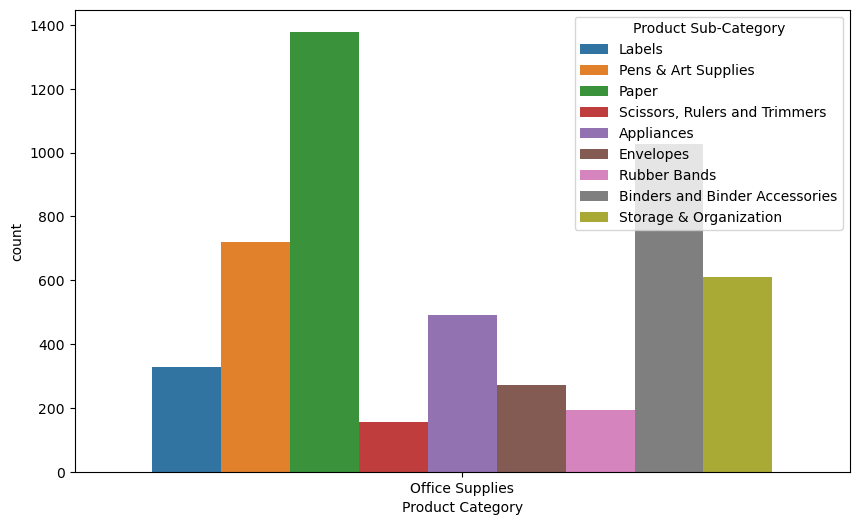

In [147]:
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category", data = dataset[dataset["Product Category"] == "Office Supplies"], hue="Product Sub-Category")
plt.show()

In [153]:
dataset["Order year"] = dataset["Order Date"].dt.year

In [155]:
dataset["Order year"].value_counts()

Order year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

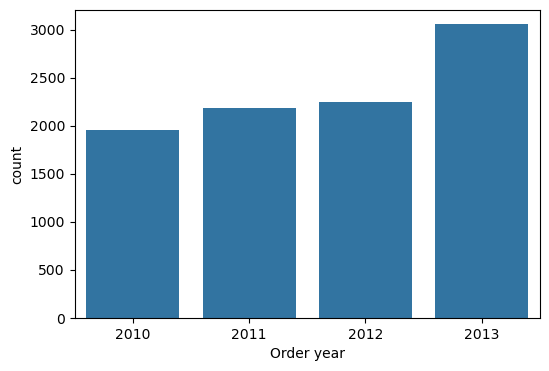

In [157]:
plt.figure(figsize=(6,4))
sns.countplot(x="Order year", data = dataset)
plt.show()

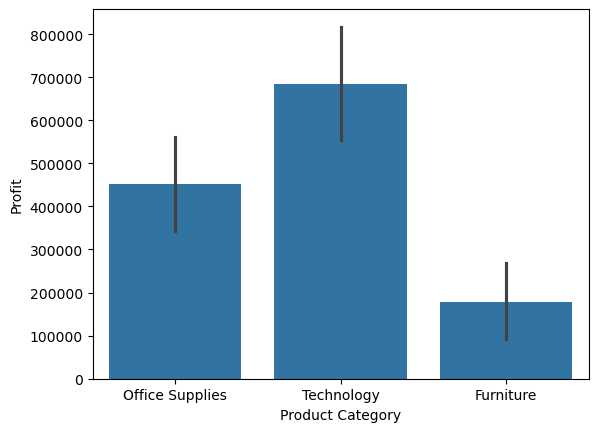

In [163]:
# Analyzing profit based on product category
sns.barplot(x="Product Category",
           y="Profit",
           data=dataset, estimator="sum")
plt.show()

In [167]:
dataset["State or Province"].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64